In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import ttest_rel
from scipy.stats import chi2_contingency

In [ ]:
#loading data set itno dataframe 
df=pd.read_csv('Sales_add.csv')

In [ ]:
#to see if dataset is loaded properly using head()
df.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [ ]:
#checking if null values presents,to get information about total no of rows and columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


###Number of rows=22 and columns =5

In [ ]:
df.isnull().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

###No null values present

In [ ]:
df.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


#Case Study:-

##1.The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

###Assumptions:-
####1.The sample is randomly selected
####2.Each of the paired measurements are obtained from the same subject.
####3.The distribution of differences is normally distributed.

##Step1:Defining the null hypothesis (H0) and alternate hypothesis(HA)
1.H0=The sales  after stepping into digital marketing is less than or same as sales before stepping into digital marketing.

2.HA=The sales has increased after stepping into digital marketing.

##Step2:Deciding the Significance Level(alpha).

The significance level (alpha) is the uncertainty we accept when rejecting the null hypothesis in a hypothesis test.

lets take alpha=0.05

In [ ]:
alpha=0.05

##Step3.Calculating the t-score and P-value

#####Checking for normality-Normal distributions are symmetric, which means they are equal on both sides of the center. Normal distributions do not have extreme values, or outliers.

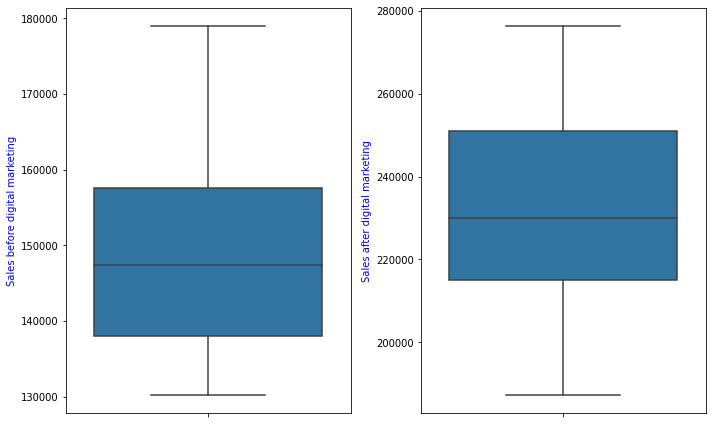

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(y='Sales_before_digital_add(in $)',data=df)
plt.ylabel('Sales before digital marketing',c='b')
plt.subplot(1,2,2)
sns.boxplot(y='Sales_After_digital_add(in $)',data=df)
plt.ylabel('Sales after digital marketing',c='b')
plt.tight_layout()

####From the graph it is clear that no outliers are present in the data

#Paired t-test can be used here to check the before and after effect of digital marketing on sales.

####Paired t-test:- Paired t-tests are used when the same item or group is tested twice, which is known as a repeated measures t-test.

In [ ]:
t_stat,p_value=ttest_rel(df['Sales_After_digital_add(in $)'],df['Sales_before_digital_add(in $)'], alternative='greater')

In [ ]:
#P-value for test statistic
p_value

3.168333502287889e-11

In [ ]:
#test statistic vlaue
t_stat

12.09070525287017

##Step4. Conclusion

####There are two main approaches for making the conclusion of a hypothesis test:

1.The critical value approach compares the test statistic with the critical value of the significance level.

2.The P-value approach compares the P-value of the test statistic and with the significance level.

 The two approaches are only different in how they present the conclusion.

###Method1:-Comapring the P-value of test statistic with the signficance level(alpha)

In [ ]:
#Comapring the P-value of test statistic with the signficance level(alpha)
#taken alpha as 0.05 
if p_value<=alpha:
  print('Reject the null hypothesis,H0')
else:
  print('Accept the null hypothesis,H0 ')

Reject the null hypothesis,H0


###Method 2:-comparing the test statistic value(t_stat) with the critical value of the significance level(alpha)

The Degree of Freedom is given by = n-1

n=22

i.e. The Degree of Freedom = 22-1 = 21

In [ ]:
critical_value=1.7207#critical value for degree of freedom =21 and alpha=0.05 from the T-table

In [ ]:
if t_stat>critical_value:
  print('Reject the null hypothesis,H0')
else:
  print('Accept the null hypothesis,H0 ')

Reject the null hypothesis,H0


###Using both the methods the result we get is same.
###ie. Rejecting the null hypothesis means accepting the alternative hypothesis.
###Thus we can say that the sales has increased after stepping into Digital marketing.

#2.The company needs to check whether there is any dependency between the features “Region” and “Manager”

##Step1:Defining the null hypothesis (H0) and alternate hypothesis(HA)
1.H0=There is no dependency between the Region and Manager features.

2.HA=There is dependency between the Region and Manager features.


##Step2:Deciding the Significance Level(alpha).
The significance level (alpha) is the uncertainty we accept when rejecting the null hypothesis in a hypothesis test.

lets take alpha=0.05

In [ ]:
alpha=0.05

In [ ]:
df_tabdata=pd.crosstab(df['Region'],df['Manager'])

In [ ]:
df_tabdata

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


#step3.Calculating the Chi-square value and P value

##Chi-square test of independence can be  used here to check the dependencies of Region and Managers features.
####The chi-square test of independence also known as the chi-square test of association is used to determine the association between the categorical variables. It is considered as a non-parametric test. It is mostly used to test statistical independence.

In [ ]:
calc_chi2_value,p_value,deg_freedom,exp_value=chi2_contingency(df_tabdata)

###Method1:-Comapring the P-value of test statistic with the signficance level(alpha)

In [ ]:
p_value

0.5493991051158094

In [ ]:
#Comapring the P-value of test statistic with the signficance level(alpha)
#taken alpha as 0.05 
if p_value<=alpha:
  print('Reject the null hypothesis,H0')
else:
  print('Accept the null hypothesis,H0 ')

Accept the null hypothesis,H0 


###Method 2:-Comparing the test statistic value(calc_chi2_value) with the critical value of the significance level(alpha) and degree of freedom from the Chi-square table.

In [ ]:
calc_chi2_value

3.050566893424036

In [ ]:
#degree of freedom=((number of rows-1)*(number of columns -1))
deg_freedom

4

In [ ]:
#Chi-square critical value for degree of freedom =4 and alpha=0.05 from the Chi-square-table
chi2_critical_value=9.49

In [ ]:
if calc_chi2_value>chi2_critical_value:
  print('Reject the null hypothesis,H0')
else:
  print('Accept the null hypothesis,H0 ')

Accept the null hypothesis,H0 


#step4.Conclusion

###Using both the methods the result we get is same.
###ie. Accepting the null hypothesis means rejecting the alternative hypothesis.
###Thus we can say that there is no dependency between the Region and Manager features.

#Overall Conclusion:-
##1.There is increase in sales  after the company has stepped into Digital Marketing.
##2.There is no dependency between the Regions and the Managers features.